In [11]:
# pip install opencv-python
# pip install matplotlib
# pip install pandas
# pip install sklearn

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import csv
import pandas as pd
from numpy.lib.polynomial import poly
from sklearn.cluster import KMeans

In [4]:
# Crop the center bed from the original image
workingPath = 'C:/Users/17853/Documents/Pesta/pct/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_1/'
imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find('.JPG') != -1:
        rgbIm.append(im)
crop_rate_0 = 0.2
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)
    croppedImage = imgFile[(int(imgFile.shape[0]*crop_rate_0)):(int(imgFile.shape[0]*(1-crop_rate_0))-1), 0:(int(imgFile.shape[1]-1)), ]
    print(targetPath+imf)
    cv2.imwrite(targetPath+imf, croppedImage)

C:/Users/17853/Documents/Pesta/pct_1/GOPR1483.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1487.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1499.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1505.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1508.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1522.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1529.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1547.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1553.JPG
C:/Users/17853/Documents/Pesta/pct_1/GOPR1561.JPG


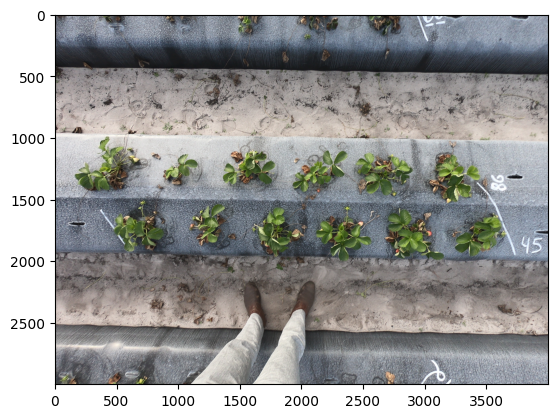

In [5]:
sample_im = Image.open(workingPath+'GOPR1522.JPG')
plt.imshow(sample_im)
plt.show()

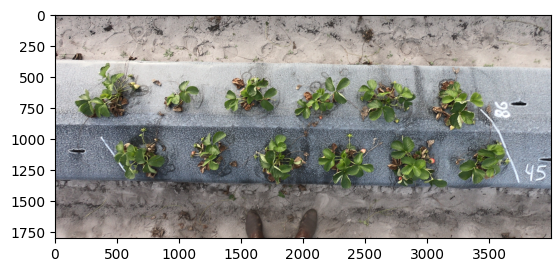

In [6]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im)
plt.show()

In [11]:
# Processing on-bed pixels
# Resize image to 30%
# Convert RGB to HSV
workingPath = 'C:/Users/17853/Documents/Pesta/pct_1/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_2/'
imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)
# percent of original size
scale_percent = 30 
# Detect each individual image
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)
    # resize image
    width = int(imgFile.shape[1] * scale_percent / 100)
    height = int(imgFile.shape[0] * scale_percent / 100)
    dim = (width, height)
    resizedImg = cv2.resize(imgFile, dim, interpolation = cv2.INTER_AREA)
    # HSV mask generation
    imgHSV = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2HSV)
    # HSV mask for plants
    l_b = np.array([26, 21, 9])
    u_b = np.array([78, 246, 254])

    fgMask = cv2.inRange(imgHSV, l_b, u_b)

    print(targetPath+imf)
    cv2.imwrite(targetPath+imf, fgMask)


C:/Users/17853/Documents/Pesta/pct_2/GOPR1483.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1487.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1499.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1505.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1508.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1522.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1529.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1547.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1553.JPG
C:/Users/17853/Documents/Pesta/pct_2/GOPR1561.JPG


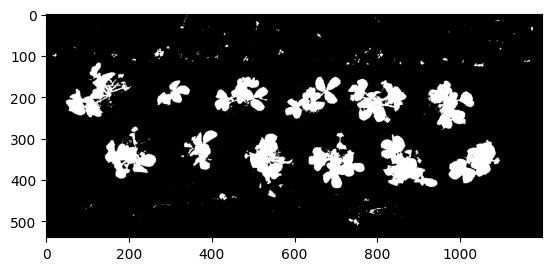

In [12]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im, cmap="gray")
plt.show()

In [13]:
# Open and Close operation to remove sparse pixels
workingPath = 'C:/Users/17853/Documents/Pesta/pct_2/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_3/'

imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)
# open and close kernels
kernel3 = np.ones((5,5),np.uint8)
kernel4 = np.ones((9,9),np.uint8)
# Detect each individual image
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)
    closed = cv2.morphologyEx(imgFile, cv2.MORPH_CLOSE, kernel3)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel4)
    print(targetPath+imf)
    cv2.imwrite(targetPath+imf, opened)


C:/Users/17853/Documents/Pesta/pct_3/GOPR1483.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1487.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1499.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1505.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1508.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1522.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1529.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1547.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1553.JPG
C:/Users/17853/Documents/Pesta/pct_3/GOPR1561.JPG


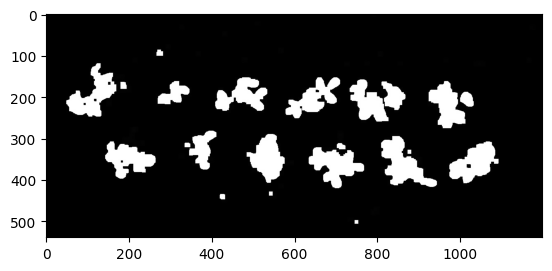

In [14]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im, cmap="gray")
plt.show()

In [15]:
# Find edges of the bed, exclude pixels out of bed
# Resize image to 30%
# Convert RGB to HSV
workingPath = 'C:/Users/17853/Documents/Pesta/pct_1/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_4/'
imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)
# percent of original size
scale_percent = 30 
# Detect each individual image
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)
    # resize image
    width = int(imgFile.shape[1] * scale_percent / 100)
    height = int(imgFile.shape[0] * scale_percent / 100)
    dim = (width, height)
    resizedImg = cv2.resize(imgFile, dim, interpolation = cv2.INTER_AREA)
    # HSV mask generation
    imgHSV = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2HSV)
    # Upper edge mask
    l_b = np.array([0, 12, 140])
    u_b = np.array([14, 38, 255])

    fgMask = cv2.inRange(imgHSV, l_b, u_b)

    print(targetPath+imf)
    cv2.imwrite(targetPath+imf, fgMask)


C:/Users/17853/Documents/Pesta/pct_4/GOPR1483.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1487.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1499.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1505.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1508.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1522.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1529.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1547.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1553.JPG
C:/Users/17853/Documents/Pesta/pct_4/GOPR1561.JPG


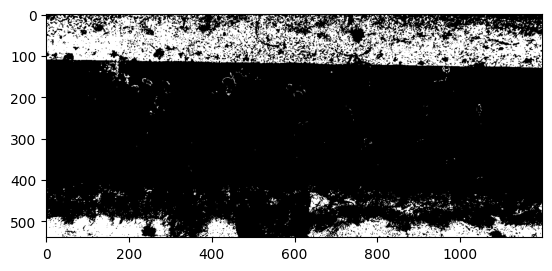

In [16]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im, cmap="gray")
plt.show()

In [17]:
workingPath = 'C:/Users/17853/Documents/Pesta/pct_4/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_5/'
imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)

kernel3 = np.ones((5,5),np.uint8)
kernel4 = np.ones((9,9),np.uint8)

# Detect each individual image
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)

    closed = cv2.morphologyEx(imgFile, cv2.MORPH_CLOSE, kernel4)

    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel4)

    print(targetPath+imf)
    cv2.imwrite(targetPath+imf, opened)


C:/Users/17853/Documents/Pesta/pct_5/GOPR1483.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1487.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1499.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1505.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1508.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1522.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1529.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1547.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1553.JPG
C:/Users/17853/Documents/Pesta/pct_5/GOPR1561.JPG


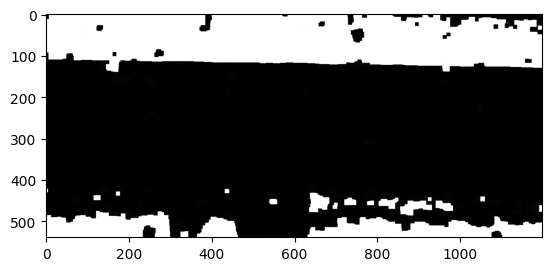

In [18]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im, cmap="gray")
plt.show()

In [2]:
workingPath = 'C:/Users/17853/Documents/Pesta/pct_5/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_6/'
finalFile = open(str(targetPath)+'UpEdge.csv', 'wt')
imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)

try:
    writer = csv.writer(finalFile, delimiter=',', lineterminator='\n')
    writer.writerow(('Images','xu0','yu0','xu1','yu1'))
    # Detect each individual image
    for imf in rgbIm:        
        imgFile = cv2.imread(workingPath+imf)

        xc = int(imgFile.shape[1]*0.5)
        yc = int(imgFile.shape[0]*0.5)
        dist0 = imgFile.shape[0]

        # Edge detection
        dst = cv2.Canny(imgFile, 100, 200, apertureSize = 3)

        # Copy edges to the images that will display the results in BGR
        cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
        cdstP = np.copy(cdst)

        # Probabilistic Line Transform
        linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, threshold = 100, lines = None, minLineLength = 200, maxLineGap = 70)

        print(targetPath+imf)
        
        # Draw the lines
        if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                if (l[1] <= yc) or (l[3] <= yc):
                    p1 = np.array([l[0], l[1]])
                    p2 = np.array([l[2], l[3]])
                    p3 = np.array([xc, yc])
                    dist_c = np.abs(np.cross(p2 - p1, p3 - p1))/np.linalg.norm(p2 - p1)
                    if dist0 >= dist_c:
                        dist0 = dist_c
        if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                if (l[1] <= yc) or (l[3]<=yc):
                    p1 = np.array([l[0], l[1]])
                    p2 = np.array([l[2], l[3]])
                    p3 = np.array([xc, yc])
                    dist_c = np.abs(np.cross(p2 - p1, p3 - p1))/np.linalg.norm(p2 - p1)
                    if dist0 == dist_c:
                        k = (l[3] - l[1])/(l[2] - l[0])
                        b = l[1] - l[0] * k
                        ys = int(k*1 + b)
                        ye = int(k*(imgFile.shape[1]-1) + b)
                        print(ys, ' ', ye)
                        cv2.line(imgFile, (1, ys), (imgFile.shape[1]-1, ye), (255,0,0), 3, cv2.LINE_AA)
                        writer.writerow((imf, 1, ys, imgFile.shape[1]-1, ye))
                        break

#         while True:
#             cv2.imshow("Detected Lines (in blue) - Probabilistic Line Transform", imgFile)
#             if cv2.waitKey(1) == ord('q'):
#                 break
finally:
    finalFile.close()        


C:/Users/17853/Documents/Pesta/pct_6/GOPR1483.JPG
118   138
C:/Users/17853/Documents/Pesta/pct_6/GOPR1487.JPG
136   115
C:/Users/17853/Documents/Pesta/pct_6/GOPR1499.JPG
122   122
C:/Users/17853/Documents/Pesta/pct_6/GOPR1505.JPG
170   187
C:/Users/17853/Documents/Pesta/pct_6/GOPR1508.JPG
210   252
C:/Users/17853/Documents/Pesta/pct_6/GOPR1522.JPG
108   129
C:/Users/17853/Documents/Pesta/pct_6/GOPR1529.JPG
78   96
C:/Users/17853/Documents/Pesta/pct_6/GOPR1547.JPG
129   171
C:/Users/17853/Documents/Pesta/pct_6/GOPR1553.JPG
137   137
C:/Users/17853/Documents/Pesta/pct_6/GOPR1561.JPG
157   136


In [3]:
workingPath = 'C:/Users/17853/Documents/Pesta/pct_1/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_7/'
imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)
# percent of original size
scale_percent = 30 
# Detect each individual image
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)
    # resize image
    width = int(imgFile.shape[1] * scale_percent / 100)
    height = int(imgFile.shape[0] * scale_percent / 100)
    dim = (width, height)
    resizedImg = cv2.resize(imgFile, dim, interpolation = cv2.INTER_AREA)
    # HSV mask generation
    imgHSV = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2HSV)
    # lower edge
    l_b = np.array([72, 52, 93])
    u_b = np.array([114, 114, 180])

    fgMask = cv2.inRange(imgHSV, l_b, u_b)

    print(targetPath+imf)
    cv2.imwrite(targetPath+imf, fgMask)


C:/Users/17853/Documents/Pesta/pct_7/GOPR1483.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1487.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1499.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1505.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1508.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1522.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1529.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1547.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1553.JPG
C:/Users/17853/Documents/Pesta/pct_7/GOPR1561.JPG


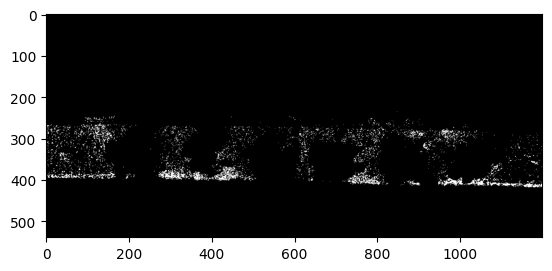

In [4]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im, cmap="gray")
plt.show()

In [5]:
workingPath = 'C:/Users/17853/Documents/Pesta/pct_7/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_8/'
imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)

kernel3 = np.ones((5,5),np.uint8)
kernel4 = np.ones((9,9),np.uint8)
kernel5 = np.ones((11,11),np.uint8)

# Detect each individual image
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)
    closed = cv2.morphologyEx(imgFile, cv2.MORPH_CLOSE, kernel5)
    print(targetPath+imf)
    cv2.imwrite(targetPath+imf, closed)


C:/Users/17853/Documents/Pesta/pct_8/GOPR1483.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1487.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1499.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1505.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1508.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1522.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1529.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1547.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1553.JPG
C:/Users/17853/Documents/Pesta/pct_8/GOPR1561.JPG


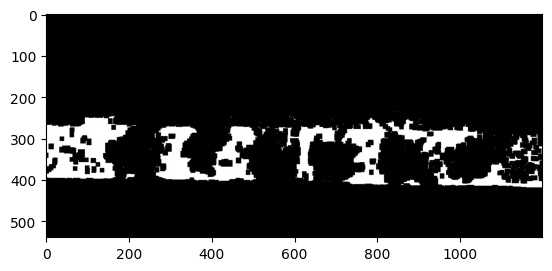

In [6]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im, cmap="gray")
plt.show()

In [7]:
workingPath = 'C:/Users/17853/Documents/Pesta/pct_8/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_9/'
finalFile = open(str(targetPath)+'DownEdge.csv', 'wt')

imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)

try:
    writer = csv.writer(finalFile, delimiter=',', lineterminator='\n')
    writer.writerow(('Images','xd0','yd0','xd1','yd1'))
    # Detect each individual image
    for imf in rgbIm:        
        imgFile = cv2.imread(workingPath+imf)

        xc = int(imgFile.shape[1]*0.5)
        yc = int(imgFile.shape[0]*0.5)
        dist0 = 0 # imgFile.shape[0]

        # Edge detection
        dst = cv2.Canny(imgFile, 100, 200, apertureSize = 3)

        # Copy edges to the images that will display the results in BGR
        cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
        cdstP = np.copy(cdst)

        # Probabilistic Line Transform
        linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, threshold = 100, lines = None, minLineLength = 120, maxLineGap = 70)

        print(targetPath+imf)
        
        # Draw the lines
        if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                if (l[1] >= yc) or (l[3] >= yc):
                    p1 = np.array([l[0], l[1]])
                    p2 = np.array([l[2], l[3]])
                    p3 = np.array([xc, yc])
                    dist_c = np.abs(np.cross(p2 - p1, p3 - p1))/np.linalg.norm(p2 - p1)
                    if dist0 <= dist_c:
                        dist0 = dist_c
        if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                if (l[1] >= yc) or (l[3]>=yc):
                    p1 = np.array([l[0], l[1]])
                    p2 = np.array([l[2], l[3]])
                    p3 = np.array([xc, yc])
                    dist_c = np.abs(np.cross(p2 - p1, p3 - p1))/np.linalg.norm(p2 - p1)
                    if dist0 == dist_c:
                        k = (l[3] - l[1])/(l[2] - l[0])
                        b = l[1] - l[0] * k
                        ys = int(k*1 + b)
                        ye = int(k*(imgFile.shape[1]-1) + b)
                        if ye > imgFile.shape[0]:
                            ye = imgFile.shape[0]
                        print(ys, ' ', ye)
                        cv2.line(imgFile, (1, ys), (imgFile.shape[1]-1, ye), (255,0,0), 3, cv2.LINE_AA)
                        writer.writerow((imf, 1, ys, imgFile.shape[1]-1, ye))
                        break

#         while True:
#             # cv2.imshow("Source", src)
#             cv2.imshow("Detected Lines (in blue) - Probabilistic Line Transform", imgFile)
#             if cv2.waitKey(1) == ord('q'):
#                 break
finally:
    finalFile.close()    


C:/Users/17853/Documents/Pesta/pct_9/GOPR1483.JPG
387   407
C:/Users/17853/Documents/Pesta/pct_9/GOPR1487.JPG
388   410
C:/Users/17853/Documents/Pesta/pct_9/GOPR1499.JPG
401   421
C:/Users/17853/Documents/Pesta/pct_9/GOPR1505.JPG
455   455
C:/Users/17853/Documents/Pesta/pct_9/GOPR1508.JPG
502   539
C:/Users/17853/Documents/Pesta/pct_9/GOPR1522.JPG
397   418
C:/Users/17853/Documents/Pesta/pct_9/GOPR1529.JPG
353   371
C:/Users/17853/Documents/Pesta/pct_9/GOPR1547.JPG
425   463
C:/Users/17853/Documents/Pesta/pct_9/GOPR1553.JPG
413   413
C:/Users/17853/Documents/Pesta/pct_9/GOPR1561.JPG
421   421


In [10]:
# Crop plants on bed

workingPath = 'C:/Users/17853/Documents/Pesta/pct_3/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_10/'

workingPath1 = 'C:/Users/17853/Documents/Pesta/pct_6/'
workingPath2 = 'C:/Users/17853/Documents/Pesta/pct_9/'

dfUpEdges= pd.read_csv(str(workingPath1)+'UpEdge.csv', usecols=['Images', 'yu0', 'yu1'])
dfDownEdges = pd.read_csv(str(workingPath2)+'DownEdge.csv', usecols=['Images', 'yd0', 'yd1'])

dfBothEdges = dfUpEdges.merge(dfDownEdges, left_on='Images', right_on='Images', how='left')

print(dfBothEdges)

imageFiles = os.listdir(workingPath)
rgbIm = []
for im in imageFiles:
    if im.find(".JPG") != -1:
        rgbIm.append(im)

# Detect each individual image
for imf in rgbIm:        
    imgFile = cv2.imread(workingPath+imf)
    imgHeight = imgFile.shape[0]
    imgWidth = imgFile.shape[1]

    if dfBothEdges['Images'].str.contains(imf).any():
        # print('yes')
        yu0 = int(dfBothEdges['yu0'][dfBothEdges['Images'] == imf])
        yu1 = int(dfBothEdges['yu1'][dfBothEdges['Images'] == imf])
        yd0 = int(dfBothEdges['yd0'][dfBothEdges['Images'] == imf])
        yd1 = int(dfBothEdges['yd1'][dfBothEdges['Images'] == imf])
    else:
        yu0 = 0
        yu1 = 0
        yd0 = imgHeight
        yd1 = imgHeight
    print(imf, ' ', yu0, ' ', yu1, ' ', yd0, ' ', yd1)
    mask = np.zeros((imgHeight, imgWidth), dtype=np.uint8)
    polyPoints = np.array([[[0, yu0], [imgWidth, yu1], [imgWidth, yd1], [0, yd0]]])
    cv2.fillPoly(mask, polyPoints, (255))

    cropped = cv2.bitwise_and(imgFile, imgFile, mask = mask)
    # while True:
    #     # cv2.imshow("Source", src)
    #     cv2.imshow("Croppred", cropped)
    #     if cv2.waitKey(1) == ord('q'):
    #         break
    cv2.imwrite(targetPath+imf, cropped)



         Images  yu0  yu1  yd0  yd1
0  GOPR1483.JPG  118  138  387  407
1  GOPR1487.JPG  136  115  388  410
2  GOPR1499.JPG  122  122  401  421
3  GOPR1505.JPG  170  187  455  455
4  GOPR1508.JPG  210  252  502  539
5  GOPR1522.JPG  108  129  397  418
6  GOPR1529.JPG   78   96  353  371
7  GOPR1547.JPG  129  171  425  463
8  GOPR1553.JPG  137  137  413  413
9  GOPR1561.JPG  157  136  421  421
GOPR1483.JPG   118   138   387   407
GOPR1487.JPG   136   115   388   410
GOPR1499.JPG   122   122   401   421
GOPR1505.JPG   170   187   455   455
GOPR1508.JPG   210   252   502   539
GOPR1522.JPG   108   129   397   418
GOPR1529.JPG   78   96   353   371
GOPR1547.JPG   129   171   425   463
GOPR1553.JPG   137   137   413   413
GOPR1561.JPG   157   136   421   421


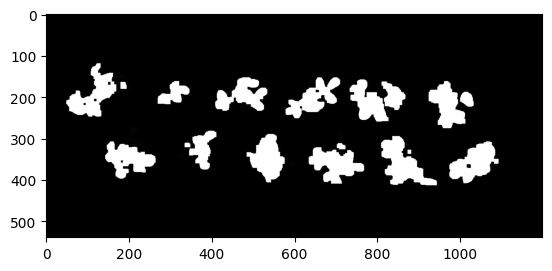

In [12]:
sample_im = Image.open(targetPath+'GOPR1522.JPG')
plt.imshow(sample_im, cmap="gray")
plt.show()

In [13]:
# Cluster plants
filename = targetPath+'GOPR1522.JPG'
imgFileNum = filename.split('/')[-1].replace('.JPG', '_')
print(imgFileNum[:-1])
img = cv2.imread(filename)

GOPR1522


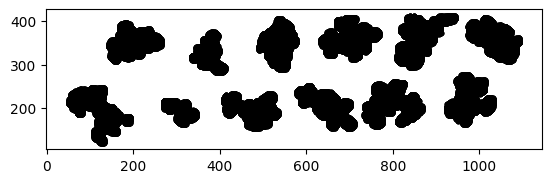

In [14]:
targetPath = 'C:/Users/17853/Documents/Pesta/pct_11/'
ep = np.argwhere(img == 255)
x=ep[:,1]
y=ep[:,0]
points = np.stack((x, y), axis = -1)
fig = plt.figure()
plt.scatter(points[:, 0], points[:, 1],s=10,c='k')
axes=plt.gca()
axes.set_aspect('equal')
plt.savefig(targetPath + 'UpSideDown.jpg')
plt.show()

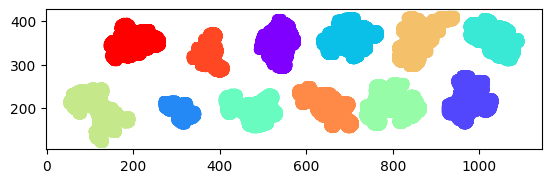

In [15]:
kmean = KMeans(n_clusters = 12)
kmean.fit(points)
fig = plt.figure()
plt.scatter(points[:, 0], points[:, 1], c=kmean.labels_, cmap = 'rainbow')#,label=np.unique(kmean.labels_))
axes=plt.gca()
axes.set_aspect('equal')
plt.savefig(targetPath + 'UpSideDown.jpg')
plt.show()

In [18]:
pLabels = np.stack((x, y, kmean.labels_), axis = -1)
df = pd.DataFrame(pLabels, columns = ['x', 'y', 'label'])
u_labels = np.unique(kmean.labels_)
print(u_labels)
pOrder = [12, 6, 11, 5, 10, 4, 9, 3, 8, 2, 7, 1]
dfs = pd.DataFrame({'Labels': u_labels})
dfs['x_min'] = dfs['Labels']
dfs['x_max'] = dfs['Labels']
dfs['y_min'] = dfs['Labels']
dfs['y_max'] = dfs['Labels']
dfs['x_c'] = dfs['Labels']
dfs['y_c'] = dfs['Labels']
for i in u_labels:
    dfs['x_min'][i] = df['x'][df['label'] == i].min()
    dfs['x_max'][i] = df['x'][df['label'] == i].max()
    dfs['y_min'][i] = df['y'][df['label'] == i].min()
    dfs['y_max'][i] = df['y'][df['label'] == i].max()
    dfs['x_c'][i] = df['x'][df['label'] == i].mean()
    dfs['y_c'][i] = df['y'][df['label'] == i].mean()
dfs.sort_values(by=['x_c'], inplace = True)
dfs['plot'] = pOrder
print(dfs)


[ 0  1  2  3  4  5  6  7  8  9 10 11]
    Labels  x_min  x_max  y_min  y_max          x_c         y_c  plot
7        7     50    193    119    247   114.900246  195.921321    12
11      11    143    264    308    397   200.045721  350.141462     6
2        2    270    346    162    217   307.507669  192.920245    11
10      10    335    411    282    375   376.468793  324.695215     5
5        5    409    534    153    233   475.012448  195.246560    10
0        0    490    576    290    406   536.095631  347.892070     4
9        9    579    710    153    251   645.946509  204.324597     9
3        3    635    768    312    409   698.634328  361.927363     3
6        6    734    868    158    259   796.947163  208.877286     8
8        8    810    944    295    413   860.912485  360.676673     2
1        1    925   1033    162    275   974.269604  218.801057     7
4        4    975   1093    308    408  1034.857794  359.066036     1


C:\Users\17853\AppData\Local\Temp\ipykernel_11368\1821079187.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['y_c'][i] = df['y'][df['label'] == i].mean()
C:\Users\17853\AppData\Local\Temp\ipykernel_11368\1821079187.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['x_min'][i] = df['x'][df['label'] == i].min()
C:\Users\17853\AppData\Local\Temp\ipykernel_11368\1821079187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
targetPathFinal = 'C:/Users/17853/Documents/Pesta/pct_final/'
targetPath = 'C:/Users/17853/Documents/Pesta/pct_1/'
filename2 = targetPath+imgFileNum[:-1]+'.JPG'
img2 = cv2.imread(filename2)
for j in range (len(dfs['plot'])):
    crop_img = img2[int(dfs['y_min'][j]/0.3-5) : int(dfs['y_max'][j]/0.3+5), int(dfs['x_min'][j]/0.3)+1 : int(dfs['x_max'][j]/0.3-1)]
    cv2.imwrite(targetPathFinal+imgFileNum+str(dfs['plot'][j])+'.JPG', crop_img)